## ADD Modules

In [39]:
import numpy
from tensorflow import keras
from keras.constraints import MaxNorm
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.layers import Activation
from sklearn.metrics import confusion_matrix
import keras.utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt

## Load Data

In [70]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [71]:
X_test.shape

(10000, 32, 32, 3)

In [72]:
y_train[0]

array([6], dtype=uint8)

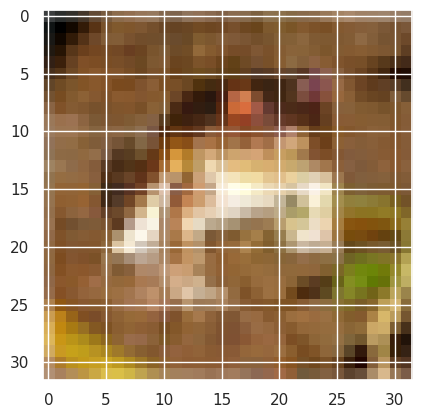

In [73]:
plt.imshow(X_train[0])

##Normalize

In [74]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [75]:
# One-hot encode outputs
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)


In [76]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [77]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [33]:
num_class= len(y_test[0])
num_class

10

In [36]:
input=X_train.shape[1:]

## Building the Model

In [50]:
model= Sequential()
model.add(Conv2D(128, (3,3), padding='valid', input_shape=input ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='valid' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3), padding='valid' ))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=num_class, activation='softmax'))


In [51]:
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 128)       3584      
                                                                 
 batch_normalization_14 (Ba  (None, 30, 30, 128)       512       
 tchNormalization)                                               
                                                                 
 activation_13 (Activation)  (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 15, 15, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 64)        73792     
                                                                 
 batch_normalization_15 (Ba  (None, 13, 13, 64)       

##Training the Model

In [53]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 11s 11ms/step - loss: 1.4250 - accuracy: 0.4815 - val_loss: 1.4427 - val_accuracy: 0.4870
Epoch 2/30
782/782 [==============================] - 7s 9ms/step - loss: 1.0752 - accuracy: 0.6202 - val_loss: 1.9354 - val_accuracy: 0.4413
Epoch 3/30
782/782 [==============================] - 9s 11ms/step - loss: 0.9318 - accuracy: 0.6750 - val_loss: 0.9222 - val_accuracy: 0.6764
Epoch 4/30
782/782 [==============================] - 8s 10ms/step - loss: 0.8486 - accuracy: 0.7042 - val_loss: 0.9254 - val_accuracy: 0.6784
Epoch 5/30
782/782 [==============================] - 8s 11ms/step - loss: 0.7792 - accuracy: 0.7301 - val_loss: 0.9289 - val_accuracy: 0.6813
Epoch 6/30
782/782 [==============================] - 9s 11ms/step - loss: 0.7278 - accuracy: 0.7473 - val_loss: 0.9487 - val_accuracy: 0.6703
Epoch 7/30
782/782 [==============================] - 10s 12ms/step - loss: 0.6815 - accuracy: 0.7638 - val_loss: 1.0284 - val_accuracy: 0.653

In [54]:
for key,val in history.history.items():
  print(key)

loss
accuracy
val_loss
val_accuracy


<Axes: >

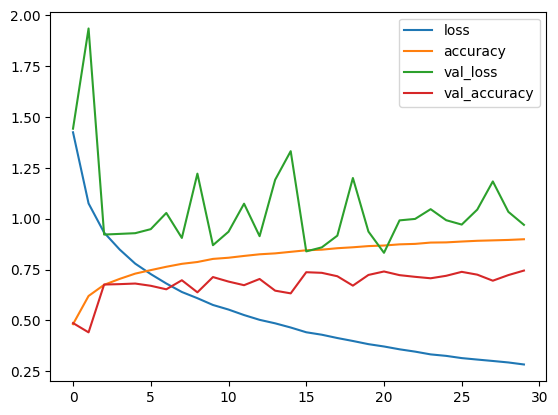

In [55]:
import pandas as pd
pd.DataFrame(history.history).plot()

<function matplotlib.pyplot.show(close=None, block=None)>

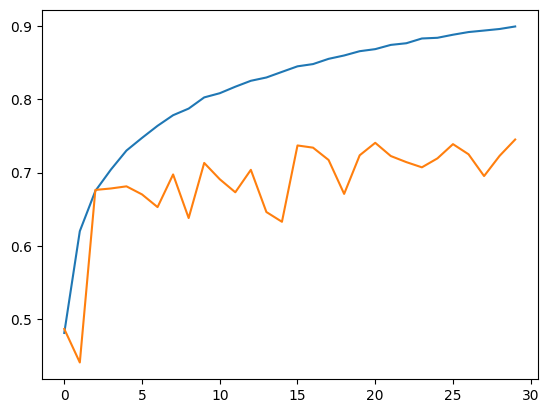

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show

In [57]:
model.save('CNN_cifar10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [58]:
model2 = load_model('CNN_cifar10.h5')

In [59]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [60]:
import numpy as np
import seaborn as sns; sns.set()

In [61]:
np.argmax(model2.predict(X_test[0:10])[0])

1/1 [==============================] - 0s 498ms/step


3

In [62]:
predictions = model.predict(X_test)
print(predictions.shape)
predictions = np.argmax(predictions, axis = 1)
print(predictions)

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[3 8 8 ... 5 0 7]


In [78]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [79]:
y_test=np.argmax(y_test, axis=1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

## Confusion Matrix

313/313 [==============================] - 1s 3ms/step


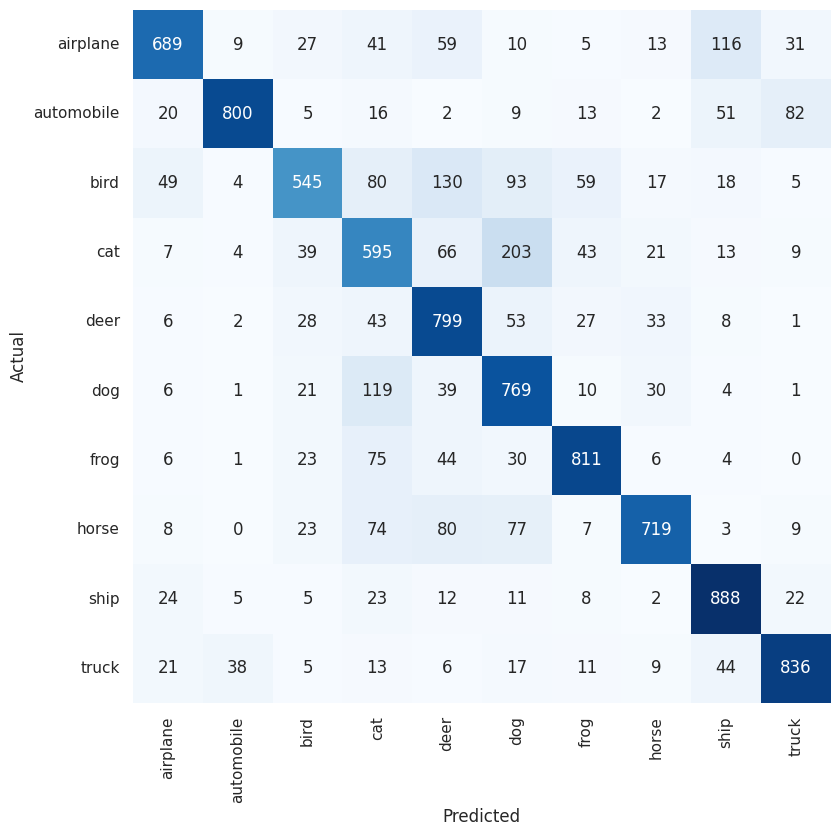

In [80]:
predictions = model.predict(X_test)

predictions = np.argmax(predictions, axis = 1)

cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

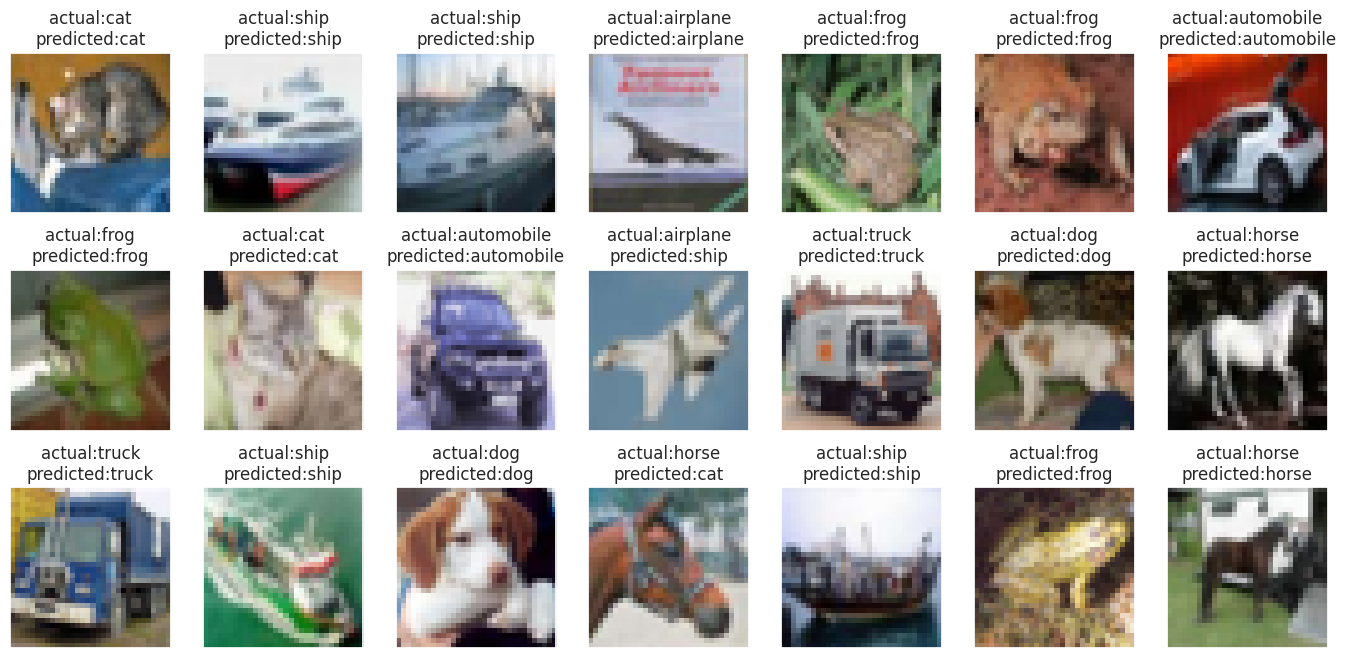

In [81]:
y_test = y_test.astype(int)
predictions = predictions.astype(int)

fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labels[y_test[index]] + '\n' + 'predicted:' + labels[predictions[index]])
        axes[i,j].imshow(X_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()